<a href="https://colab.research.google.com/github/chrisfeltner/feltner-cop4630/blob/master/HW2/ChristopherFeltnerHomework2Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2
##Problem 3
##Christopher Feltner

In [0]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

train_images = train_images.reshape((50000, 32, 32, 3)) / 255
test_images = test_images.reshape((10000, 32, 32, 3)) / 255

(50000, 10)


In [0]:
from keras import layers
from keras import models

## Pretty-good model
### Uses dropout to fight overfitting

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 4, 4, 64)        

In [0]:
epochs = 35

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 12s 239us/step - loss: 1.6528 - acc: 0.3898 - val_loss: 1.3206 - val_acc: 0.5244
Epoch 2/35
50000/50000 [==============================] - 10s 204us/step - loss: 1.2992 - acc: 0.5316 - val_loss: 1.1816 - val_acc: 0.5858
Epoch 3/35
50000/50000 [==============================] - 10s 206us/step - loss: 1.1843 - acc: 0.5788 - val_loss: 1.0729 - val_acc: 0.6204
Epoch 4/35
50000/50000 [==============================] - 10s 202us/step - loss: 1.1064 - acc: 0.6076 - val_loss: 0.9759 - val_acc: 0.6543
Epoch 5/35
50000/50000 [==============================] - 10s 203us/step - loss: 1.0523 - acc: 0.6255 - val_loss: 0.9197 - val_acc: 0.6807
Epoch 6/35
50000/50000 [==============================] - 10s 205us/step - loss: 1.0103 - acc: 0.6415 - val_loss: 0.9331 - val_acc: 0.6690
Epoch 7/35
50000/50000 [==============================] - 10s 201us/step - loss: 0.9792 - acc: 0.6572 - val_loss: 0.

##"Pretty Good" Model Evaluation

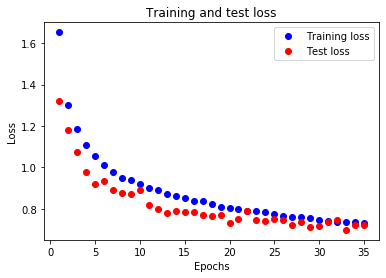

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

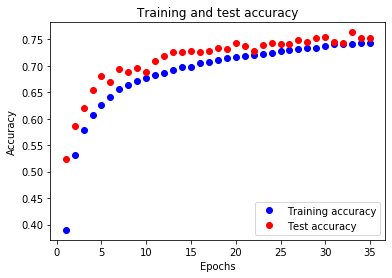

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Underfitting Model
### Model is too simple to explain data, and training is too short

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 30, 30, 1)         28        
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 15, 15, 1)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 225)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                2260      
Total params: 2,288
Trainable params: 2,288
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 5

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 181us/step - loss: 2.0891 - acc: 0.2474 - val_loss: 1.9990 - val_acc: 0.2980
Epoch 2/5
50000/50000 [==============================] - 7s 147us/step - loss: 1.9583 - acc: 0.3084 - val_loss: 1.9347 - val_acc: 0.3191
Epoch 3/5
50000/50000 [==============================] - 7s 148us/step - loss: 1.9179 - acc: 0.3225 - val_loss: 1.9049 - val_acc: 0.3319
Epoch 4/5
50000/50000 [==============================] - 7s 150us/step - loss: 1.8959 - acc: 0.3303 - val_loss: 1.8967 - val_acc: 0.3320
Epoch 5/5
50000/50000 [==============================] - 7s 148us/step - loss: 1.8818 - acc: 0.3333 - val_loss: 1.8862 - val_acc: 0.3361


##Underfitting Model Evaluation

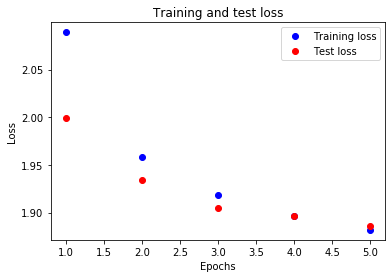

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

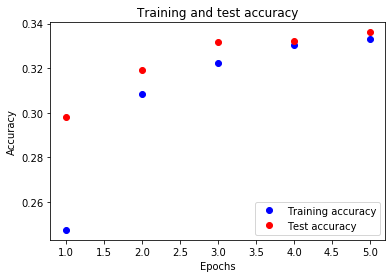

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfitting Model
## Model is complicated and no dropout is used. Adapts too easily to the training data.

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1024)            

In [0]:
epochs = 20

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 246us/step - loss: 1.5050 - acc: 0.4462 - val_loss: 1.2627 - val_acc: 0.5521
Epoch 2/20
50000/50000 [==============================] - 10s 208us/step - loss: 1.0936 - acc: 0.6122 - val_loss: 1.0071 - val_acc: 0.6428
Epoch 3/20
50000/50000 [==============================] - 10s 209us/step - loss: 0.9011 - acc: 0.6841 - val_loss: 0.8837 - val_acc: 0.6958
Epoch 4/20
50000/50000 [==============================] - 10s 206us/step - loss: 0.7779 - acc: 0.7286 - val_loss: 0.8811 - val_acc: 0.6942
Epoch 5/20
50000/50000 [==============================] - 11s 212us/step - loss: 0.6823 - acc: 0.7600 - val_loss: 0.8526 - val_acc: 0.7113
Epoch 6/20
50000/50000 [==============================] - 11s 217us/step - loss: 0.6085 - acc: 0.7865 - val_loss: 0.8201 - val_acc: 0.7284
Epoch 7/20
50000/50000 [==============================] - 11s 211us/step - loss: 0.5314 - acc: 0.8142 - val_loss: 0.

##Overfitting Model Evaluation

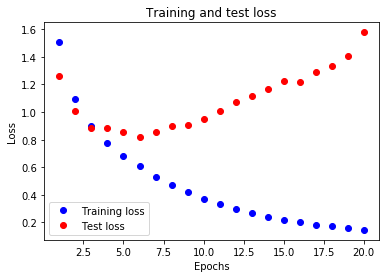

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

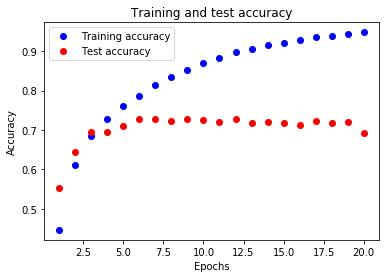

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()